<a href="https://colab.research.google.com/github/Satyake/ZTM-Pytorch-Daniele-instructor-/blob/main/Pytorch_Computer_Vision_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch 
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [2]:
train_data=datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
image,label=train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names=train_data.classes

In [6]:
class_to_idx=train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
image.shape

torch.Size([1, 28, 28])

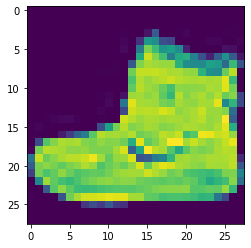

In [8]:
image,label=train_data[0]
plt.imshow(image.squeeze())
plt.show()

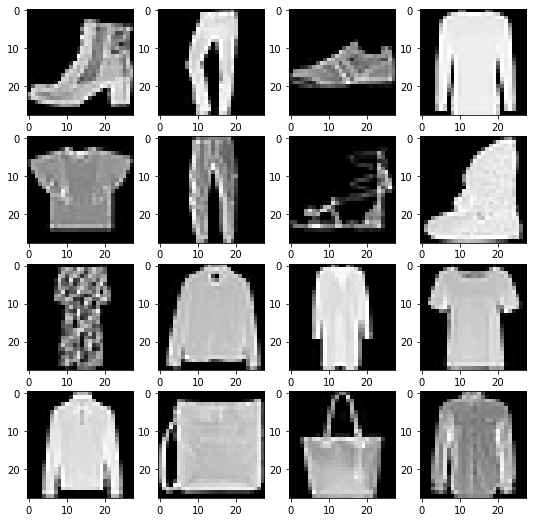

In [9]:
rows, cols=4,4
fig=plt.figure(figsize=(9,9))
for i in range(1, rows*cols+1):
  random_idx=torch.randint(0,len(train_data),size=[1]).item()
  fig.add_subplot(rows,cols,i)
  img, label=train_data[random_idx]
  plt.imshow(img.squeeze(), cmap='gray')
  

In [10]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(), Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [11]:
from torch.utils.data import DataLoader
batch_size=32
train_dataloader=DataLoader(dataset=train_data,
                            batch_size=batch_size,
                            shuffle=True)
test_dataloader=DataLoader(dataset=test_data, batch_size=batch_size,
                           shuffle=False)

In [12]:
len(train_dataloader), len(test_dataloader) #gives the batch size
train_dataloader.batch_size

32

In [13]:
train_features_batch,train_labels_batch=next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [14]:
#model
#flatten layer
flatten_layer=nn.Flatten()

#single sample
x=train_features_batch[0]
x

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [15]:
output=flatten_layer(x) #perform a single pass
print(f'shape before flattening {x.shape} | After Flattening {output.shape}') #one value per pixel 784

shape before flattening torch.Size([1, 28, 28]) | After Flattening torch.Size([1, 784])


In [16]:
class FMNIST(nn.Module):
  def __init__(self,input_shape, hidden_units, output_shape):
    super().__init__()
    self.layers=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape))
  def forward(self, x):
      return self.layers(x)



In [17]:
torch.cuda.manual_seed(42)
model_0=FMNIST(input_shape=784, hidden_units=10, output_shape=10) # this is 28*28
model_0

FMNIST(
  (layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [18]:
dummy_x=torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.1468,  0.4757,  0.2501, -0.1791, -0.6686,  0.1190,  0.2838,  0.1840,
         -0.1099, -0.1163]], grad_fn=<AddmmBackward0>)

In [19]:
model_0.state_dict()

OrderedDict([('layers.1.weight',
              tensor([[-0.0147,  0.0199,  0.0015,  ..., -0.0107,  0.0133,  0.0144],
                      [-0.0342, -0.0036, -0.0237,  ...,  0.0151, -0.0304, -0.0004],
                      [-0.0274,  0.0249, -0.0343,  ..., -0.0079, -0.0332, -0.0021],
                      ...,
                      [ 0.0005, -0.0020,  0.0032,  ..., -0.0147, -0.0053, -0.0016],
                      [-0.0004,  0.0185, -0.0223,  ..., -0.0234, -0.0101,  0.0103],
                      [-0.0191, -0.0213,  0.0204,  ...,  0.0171, -0.0088,  0.0079]])),
             ('layers.1.bias',
              tensor([-0.0290,  0.0054,  0.0009,  0.0242,  0.0164, -0.0270,  0.0061, -0.0289,
                       0.0147,  0.0153])),
             ('layers.2.weight',
              tensor([[ 0.2877,  0.2061,  0.0480, -0.2190,  0.2812, -0.1169, -0.2332, -0.0807,
                        0.0147,  0.0316],
                      [-0.1918, -0.1331, -0.1352, -0.2013,  0.1926,  0.2695, -0.2639, -0.0398,


In [20]:
import requests
from pathlib import Path

In [21]:
request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
with open("helper_functions.py","wb") as f:
  f.write(request.content)
  

In [22]:
from helper_functions import accuracy_fn
loss_fn=nn.CrossEntropyLoss()
optim=torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [23]:
from tqdm import tqdm
torch.manual_seed(42)
#training and test loops
epochs=100
for epoch in tqdm(range(epochs)): #wrap it around the int for progress
  train_loss=0
  for batch, (x,y) in enumerate(train_dataloader):
    model_0.train()
    #forward pass
    y_pred=model_0(x)

    #loss
    loss=loss_fn(y_pred,y)
    train_loss+=loss

    #optimzer zero grad

    optim.zero_grad()

    #loss

    loss.backward()
    
    optim.step()  # updating models parameters once per batch

    if batch %400==0:
      print(f'Looked at {batch*len(x)}/ {len(train_dataloader.dataset)} samples')

    #divide total train_loss by length of train dataloader

  train_loss/=len(train_dataloader)

    ##test loop

  test_loss, test_acc= 0, 0
  model_0.eval()
  with torch.inference_mode():
      for x_test, y_test in test_dataloader:
        #forward pass
        test_pred=model_0(x_test)
        #calcuate loss
        test_loss+=loss_fn(test_pred,y_test)
        #calculate acc
        test_acc+=accuracy_fn(y_true=y_test,y_pred=test_pred.argmax(dim=1))
      #calculate test loss
      test_loss/=len(test_dataloader)
      #calculate  test acc per batch
      test_acc/=len(test_dataloader)
      print(f"epoch {epoch}|train loss {train_loss} | test_loss {test_loss}| test_acc {test_acc}")





  0%|          | 0/100 [00:00<?, ?it/s]

Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


  1%|          | 1/100 [00:11<19:15, 11.67s/it]

epoch 0|train loss 0.5926788449287415 | test_loss 0.5067224502563477| test_acc 82.39816293929712
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


  2%|▏         | 2/100 [00:20<16:31, 10.11s/it]

epoch 1|train loss 0.4800509214401245 | test_loss 0.48236799240112305| test_acc 82.97723642172524
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


  3%|▎         | 3/100 [00:30<15:54,  9.84s/it]

epoch 2|train loss 0.4572778046131134 | test_loss 0.4807315170764923| test_acc 83.4464856230032
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


  4%|▍         | 4/100 [00:39<15:30,  9.69s/it]

epoch 3|train loss 0.44387170672416687 | test_loss 0.465670645236969| test_acc 83.60623003194888
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


  5%|▌         | 5/100 [00:49<15:16,  9.65s/it]

epoch 4|train loss 0.4367794990539551 | test_loss 0.46858829259872437| test_acc 83.2567891373802
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


  6%|▌         | 6/100 [00:58<15:06,  9.65s/it]

epoch 5|train loss 0.43011581897735596 | test_loss 0.46012648940086365| test_acc 83.79592651757189
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


  7%|▋         | 7/100 [01:09<15:17,  9.86s/it]

epoch 6|train loss 0.4252414107322693 | test_loss 0.4899316728115082| test_acc 83.28674121405751
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


  8%|▊         | 8/100 [01:18<14:56,  9.75s/it]

epoch 7|train loss 0.42320677638053894 | test_loss 0.47351160645484924| test_acc 83.35662939297124
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


  9%|▉         | 9/100 [01:28<14:47,  9.75s/it]

epoch 8|train loss 0.4207410514354706 | test_loss 0.4745028614997864| test_acc 83.36661341853035
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 10%|█         | 10/100 [01:38<14:40,  9.79s/it]

epoch 9|train loss 0.417941153049469 | test_loss 0.46226224303245544| test_acc 83.69608626198082
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 11%|█         | 11/100 [01:47<14:24,  9.71s/it]

epoch 10|train loss 0.4163208603858948 | test_loss 0.4640677869319916| test_acc 83.59624600638978
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 12%|█▏        | 12/100 [01:57<14:06,  9.62s/it]

epoch 11|train loss 0.41276758909225464 | test_loss 0.46384719014167786| test_acc 83.68610223642173
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 13%|█▎        | 13/100 [02:06<13:46,  9.50s/it]

epoch 12|train loss 0.4108774662017822 | test_loss 0.4634283483028412| test_acc 83.995607028754
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 14%|█▍        | 14/100 [02:15<13:33,  9.46s/it]

epoch 13|train loss 0.4100041687488556 | test_loss 0.4628605544567108| test_acc 84.10543130990415
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 15%|█▌        | 15/100 [02:25<13:21,  9.43s/it]

epoch 14|train loss 0.4080544412136078 | test_loss 0.4759555160999298| test_acc 82.96725239616613
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 16%|█▌        | 16/100 [02:34<13:10,  9.41s/it]

epoch 15|train loss 0.4082585275173187 | test_loss 0.4862426519393921| test_acc 83.14696485623003
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 17%|█▋        | 17/100 [02:43<12:59,  9.39s/it]

epoch 16|train loss 0.40574902296066284 | test_loss 0.4756714105606079| test_acc 83.37659744408946
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 18%|█▊        | 18/100 [02:53<12:42,  9.30s/it]

epoch 17|train loss 0.40520769357681274 | test_loss 0.5011674761772156| test_acc 82.61781150159744
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 19%|█▉        | 19/100 [03:02<12:38,  9.37s/it]

epoch 18|train loss 0.4044541120529175 | test_loss 0.4702298641204834| test_acc 83.37659744408946
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 20%|██        | 20/100 [03:12<12:44,  9.55s/it]

epoch 19|train loss 0.40299108624458313 | test_loss 0.4610028862953186| test_acc 83.89576677316293
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 21%|██        | 21/100 [03:21<12:29,  9.49s/it]

epoch 20|train loss 0.401134192943573 | test_loss 0.4821503758430481| test_acc 83.67611821086263
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 22%|██▏       | 22/100 [03:31<12:29,  9.61s/it]

epoch 21|train loss 0.40013816952705383 | test_loss 0.47887301445007324| test_acc 83.69608626198082
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 23%|██▎       | 23/100 [03:41<12:13,  9.52s/it]

epoch 22|train loss 0.40140560269355774 | test_loss 0.45166367292404175| test_acc 84.23522364217253
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 24%|██▍       | 24/100 [03:50<12:08,  9.58s/it]

epoch 23|train loss 0.400500625371933 | test_loss 0.45801985263824463| test_acc 83.49640575079871
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 25%|██▌       | 25/100 [04:00<11:57,  9.56s/it]

epoch 24|train loss 0.39945006370544434 | test_loss 0.4682551920413971| test_acc 83.8258785942492
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 26%|██▌       | 26/100 [04:09<11:46,  9.55s/it]

epoch 25|train loss 0.3979492485523224 | test_loss 0.4623469114303589| test_acc 83.8158945686901
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 27%|██▋       | 27/100 [04:19<11:43,  9.64s/it]

epoch 26|train loss 0.39820900559425354 | test_loss 0.4550366997718811| test_acc 84.0055910543131
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 28%|██▊       | 28/100 [04:28<11:22,  9.48s/it]

epoch 27|train loss 0.3972305357456207 | test_loss 0.44972673058509827| test_acc 84.21525559105432
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 29%|██▉       | 29/100 [04:38<11:10,  9.44s/it]

epoch 28|train loss 0.39622071385383606 | test_loss 0.47771403193473816| test_acc 83.22683706070288
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 30%|███       | 30/100 [04:47<11:01,  9.45s/it]

epoch 29|train loss 0.3968106806278229 | test_loss 0.4594694972038269| test_acc 83.8158945686901
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 31%|███       | 31/100 [04:56<10:49,  9.42s/it]

epoch 30|train loss 0.3956136107444763 | test_loss 0.4897926449775696| test_acc 83.70607028753993
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 32%|███▏      | 32/100 [05:06<10:34,  9.33s/it]

epoch 31|train loss 0.39551863074302673 | test_loss 0.46058836579322815| test_acc 83.85583067092652
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 33%|███▎      | 33/100 [05:15<10:23,  9.30s/it]

epoch 32|train loss 0.39386165142059326 | test_loss 0.4623571038246155| test_acc 83.93570287539936
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 34%|███▍      | 34/100 [05:24<10:14,  9.30s/it]

epoch 33|train loss 0.39501693844795227 | test_loss 0.4833088219165802| test_acc 82.94728434504792
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 35%|███▌      | 35/100 [05:34<10:08,  9.36s/it]

epoch 34|train loss 0.3941463530063629 | test_loss 0.5191742777824402| test_acc 82.14856230031948
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 36%|███▌      | 36/100 [05:43<09:57,  9.33s/it]

epoch 35|train loss 0.3937196731567383 | test_loss 0.4659271240234375| test_acc 83.84584664536742
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 37%|███▋      | 37/100 [05:52<09:42,  9.24s/it]

epoch 36|train loss 0.3932604193687439 | test_loss 0.4842422902584076| test_acc 83.09704472843451
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 38%|███▊      | 38/100 [06:01<09:36,  9.30s/it]

epoch 37|train loss 0.3915562927722931 | test_loss 0.4938074052333832| test_acc 82.74760383386581
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 39%|███▉      | 39/100 [06:11<09:32,  9.38s/it]

epoch 38|train loss 0.3920830488204956 | test_loss 0.45384451746940613| test_acc 84.05551118210863
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 40%|████      | 40/100 [06:20<09:23,  9.39s/it]

epoch 39|train loss 0.39190155267715454 | test_loss 0.4648994207382202| test_acc 83.38658146964856
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 41%|████      | 41/100 [06:30<09:11,  9.35s/it]

epoch 40|train loss 0.3920431137084961 | test_loss 0.45383933186531067| test_acc 83.94568690095846
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 42%|████▏     | 42/100 [06:39<08:56,  9.24s/it]

epoch 41|train loss 0.39164596796035767 | test_loss 0.4811725616455078| test_acc 83.54632587859425
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 43%|████▎     | 43/100 [06:48<08:47,  9.26s/it]

epoch 42|train loss 0.38962095975875854 | test_loss 0.4538958966732025| test_acc 83.94568690095846
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 44%|████▍     | 44/100 [06:57<08:44,  9.37s/it]

epoch 43|train loss 0.39163362979888916 | test_loss 0.4782152771949768| test_acc 82.96725239616613
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 45%|████▌     | 45/100 [07:07<08:35,  9.38s/it]

epoch 44|train loss 0.38806819915771484 | test_loss 0.5246580839157104| test_acc 82.33825878594249
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 46%|████▌     | 46/100 [07:16<08:27,  9.40s/it]

epoch 45|train loss 0.3896930515766144 | test_loss 0.47564879059791565| test_acc 83.65615015974441
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 47%|████▋     | 47/100 [07:26<08:16,  9.36s/it]

epoch 46|train loss 0.3902314305305481 | test_loss 0.4917390048503876| test_acc 82.68769968051119
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 48%|████▊     | 48/100 [07:35<08:12,  9.47s/it]

epoch 47|train loss 0.3893369138240814 | test_loss 0.5014972686767578| test_acc 82.97723642172524
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 49%|████▉     | 49/100 [07:45<08:02,  9.45s/it]

epoch 48|train loss 0.38941875100135803 | test_loss 0.4860404133796692| test_acc 83.32667731629392
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 50%|█████     | 50/100 [07:54<07:53,  9.47s/it]

epoch 49|train loss 0.3883141875267029 | test_loss 0.473878413438797| test_acc 83.77595846645367
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 51%|█████     | 51/100 [08:03<07:38,  9.37s/it]

epoch 50|train loss 0.3878060579299927 | test_loss 0.4773983061313629| test_acc 83.4564696485623
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 52%|█████▏    | 52/100 [08:13<07:29,  9.37s/it]

epoch 51|train loss 0.3877392113208771 | test_loss 0.47022679448127747| test_acc 83.50638977635782
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 53%|█████▎    | 53/100 [08:22<07:18,  9.32s/it]

epoch 52|train loss 0.3877560496330261 | test_loss 0.4735437035560608| test_acc 83.65615015974441
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 54%|█████▍    | 54/100 [08:31<07:09,  9.33s/it]

epoch 53|train loss 0.3869735896587372 | test_loss 0.46565914154052734| test_acc 83.8158945686901
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 55%|█████▌    | 55/100 [08:41<06:59,  9.31s/it]

epoch 54|train loss 0.38772767782211304 | test_loss 0.47229117155075073| test_acc 83.79592651757189
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 56%|█████▌    | 56/100 [08:50<06:48,  9.28s/it]

epoch 55|train loss 0.38735881447792053 | test_loss 0.47021931409835815| test_acc 83.8258785942492
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 57%|█████▋    | 57/100 [08:59<06:38,  9.26s/it]

epoch 56|train loss 0.3883001506328583 | test_loss 0.4654417335987091| test_acc 83.66613418530352
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 58%|█████▊    | 58/100 [09:09<06:32,  9.34s/it]

epoch 57|train loss 0.3871849477291107 | test_loss 0.4756588637828827| test_acc 83.32667731629392
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 59%|█████▉    | 59/100 [09:18<06:25,  9.40s/it]

epoch 58|train loss 0.3868105113506317 | test_loss 0.49313685297966003| test_acc 83.03714057507987
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 60%|██████    | 60/100 [09:27<06:15,  9.39s/it]

epoch 59|train loss 0.3875057101249695 | test_loss 0.46998000144958496| test_acc 83.8158945686901
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 61%|██████    | 61/100 [09:37<06:02,  9.30s/it]

epoch 60|train loss 0.38638991117477417 | test_loss 0.48866501450538635| test_acc 83.4564696485623
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 62%|██████▏   | 62/100 [09:46<05:52,  9.27s/it]

epoch 61|train loss 0.385941743850708 | test_loss 0.4875023066997528| test_acc 83.39656549520767
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 63%|██████▎   | 63/100 [09:55<05:43,  9.28s/it]

epoch 62|train loss 0.3843352198600769 | test_loss 0.46635061502456665| test_acc 83.61621405750799
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 64%|██████▍   | 64/100 [10:04<05:35,  9.31s/it]

epoch 63|train loss 0.38717108964920044 | test_loss 0.4805607497692108| test_acc 83.6361821086262
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 65%|██████▌   | 65/100 [10:14<05:26,  9.34s/it]

epoch 64|train loss 0.38601404428482056 | test_loss 0.5050774216651917| test_acc 82.74760383386581
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 66%|██████▌   | 66/100 [10:23<05:15,  9.27s/it]

epoch 65|train loss 0.3845798969268799 | test_loss 0.4697713553905487| test_acc 83.73602236421725
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 67%|██████▋   | 67/100 [10:32<05:08,  9.35s/it]

epoch 66|train loss 0.3857535421848297 | test_loss 0.4655597507953644| test_acc 84.11541533546325
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 68%|██████▊   | 68/100 [10:42<04:56,  9.28s/it]

epoch 67|train loss 0.3840160667896271 | test_loss 0.4649379849433899| test_acc 83.88578274760384
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 69%|██████▉   | 69/100 [10:51<04:49,  9.33s/it]

epoch 68|train loss 0.3842986524105072 | test_loss 0.4745563268661499| test_acc 83.55630990415335
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 70%|███████   | 70/100 [11:00<04:38,  9.29s/it]

epoch 69|train loss 0.38637667894363403 | test_loss 0.47055473923683167| test_acc 83.36661341853035
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 71%|███████   | 71/100 [11:10<04:29,  9.31s/it]

epoch 70|train loss 0.3851134479045868 | test_loss 0.4862756133079529| test_acc 83.12699680511182
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 72%|███████▏  | 72/100 [11:19<04:21,  9.34s/it]

epoch 71|train loss 0.3847521245479584 | test_loss 0.47347524762153625| test_acc 83.27675718849841
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 73%|███████▎  | 73/100 [11:28<04:12,  9.35s/it]

epoch 72|train loss 0.3843501806259155 | test_loss 0.48405343294143677| test_acc 83.47643769968052
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 74%|███████▍  | 74/100 [11:38<04:03,  9.36s/it]

epoch 73|train loss 0.38395917415618896 | test_loss 0.4687604308128357| test_acc 84.07547923322684
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 75%|███████▌  | 75/100 [11:47<03:51,  9.27s/it]

epoch 74|train loss 0.38460057973861694 | test_loss 0.4947822690010071| test_acc 82.94728434504792
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 76%|███████▌  | 76/100 [11:57<03:45,  9.41s/it]

epoch 75|train loss 0.38396695256233215 | test_loss 0.4731918275356293| test_acc 83.6261980830671
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 77%|███████▋  | 77/100 [12:06<03:37,  9.44s/it]

epoch 76|train loss 0.383797287940979 | test_loss 0.48785853385925293| test_acc 83.30670926517571
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 78%|███████▊  | 78/100 [12:15<03:26,  9.39s/it]

epoch 77|train loss 0.382885605096817 | test_loss 0.4843381941318512| test_acc 83.70607028753993
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 79%|███████▉  | 79/100 [12:25<03:15,  9.33s/it]

epoch 78|train loss 0.3846014738082886 | test_loss 0.4873265326023102| test_acc 83.02715654952077
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 80%|████████  | 80/100 [12:34<03:04,  9.23s/it]

epoch 79|train loss 0.3840334117412567 | test_loss 0.5130985975265503| test_acc 82.44808306709265
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 81%|████████  | 81/100 [12:43<02:55,  9.23s/it]

epoch 80|train loss 0.3812907040119171 | test_loss 0.5050421357154846| test_acc 83.24680511182109
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 82%|████████▏ | 82/100 [12:52<02:46,  9.24s/it]

epoch 81|train loss 0.38336634635925293 | test_loss 0.5031506419181824| test_acc 82.63777955271566
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 83%|████████▎ | 83/100 [13:02<02:38,  9.32s/it]

epoch 82|train loss 0.38177162408828735 | test_loss 0.5139286518096924| test_acc 81.54952076677316
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 84%|████████▍ | 84/100 [13:11<02:30,  9.41s/it]

epoch 83|train loss 0.38281556963920593 | test_loss 0.4668274521827698| test_acc 83.98562300319489
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 85%|████████▌ | 85/100 [13:20<02:19,  9.30s/it]

epoch 84|train loss 0.38287922739982605 | test_loss 0.49301791191101074| test_acc 82.76757188498402
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 86%|████████▌ | 86/100 [13:29<02:10,  9.30s/it]

epoch 85|train loss 0.3829631507396698 | test_loss 0.49488556385040283| test_acc 83.23682108626198
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 87%|████████▋ | 87/100 [13:39<02:01,  9.31s/it]

epoch 86|train loss 0.3806206285953522 | test_loss 0.49097689986228943| test_acc 82.76757188498402
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 88%|████████▊ | 88/100 [13:48<01:51,  9.27s/it]

epoch 87|train loss 0.38104167580604553 | test_loss 0.503803551197052| test_acc 82.87739616613419
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 89%|████████▉ | 89/100 [13:57<01:41,  9.21s/it]

epoch 88|train loss 0.3828325867652893 | test_loss 0.48370370268821716| test_acc 83.37659744408946
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 90%|█████████ | 90/100 [14:07<01:33,  9.32s/it]

epoch 89|train loss 0.3822382092475891 | test_loss 0.4964088797569275| test_acc 82.26837060702876
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 91%|█████████ | 91/100 [14:16<01:23,  9.30s/it]

epoch 90|train loss 0.3826053738594055 | test_loss 0.5214918851852417| test_acc 81.34984025559105
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 92%|█████████▏| 92/100 [14:25<01:14,  9.29s/it]

epoch 91|train loss 0.3830142021179199 | test_loss 0.5088731050491333| test_acc 81.59944089456869
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 93%|█████████▎| 93/100 [14:35<01:05,  9.34s/it]

epoch 92|train loss 0.38287150859832764 | test_loss 0.5065000653266907| test_acc 82.99720447284345
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 94%|█████████▍| 94/100 [14:44<00:55,  9.26s/it]

epoch 93|train loss 0.3820004165172577 | test_loss 0.49019911885261536| test_acc 83.39656549520767
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 95%|█████████▌| 95/100 [14:53<00:46,  9.34s/it]

epoch 94|train loss 0.3815770745277405 | test_loss 0.4936820864677429| test_acc 82.9173322683706
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 96%|█████████▌| 96/100 [15:03<00:37,  9.35s/it]

epoch 95|train loss 0.3816105127334595 | test_loss 0.48113715648651123| test_acc 83.50638977635782
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 97%|█████████▋| 97/100 [15:12<00:28,  9.35s/it]

epoch 96|train loss 0.38126659393310547 | test_loss 0.48924732208251953| test_acc 83.61621405750799
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 98%|█████████▊| 98/100 [15:21<00:18,  9.37s/it]

epoch 97|train loss 0.3806612193584442 | test_loss 0.47055551409721375| test_acc 83.84584664536742
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 99%|█████████▉| 99/100 [15:31<00:09,  9.32s/it]

epoch 98|train loss 0.38147228956222534 | test_loss 0.49607226252555847| test_acc 83.00718849840256
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


100%|██████████| 100/100 [15:40<00:00,  9.40s/it]

epoch 99|train loss 0.380979984998703 | test_loss 0.5199794173240662| test_acc 81.9988019169329


In [24]:
def eval_model(model, dataloader, loss_fn, accuracy_fn):
  """ Return a dictionary containing the results of the model predicting on the data loader"""
  loss, acc=0,0
  model.eval()
  with torch.no_grad():
    for x, y, in dataloader:
      y_pred=model(x)
      loss+=loss_fn(y_pred,y)
      acc+=accuracy_fn(y,y_pred.argmax(dim=1))

    loss/=len(dataloader)
    acc/=len(dataloader)
  return {"test_loss": {loss.item()}, "test_acc": {acc}}

In [25]:
model_0_results=eval_model(model_0, test_dataloader, loss_fn, accuracy_fn)

In [26]:
model_0_results

{'test_loss': {0.5199794173240662}, 'test_acc': {81.9988019169329}}

In [27]:
class CNN (nn.Module):
  def __init__(self,input_shape, hidden_units, output_shape):
    super().__init__()
    self.conv_block=nn.Sequential(
        nn.Conv2d(in_channels=input_shape,out_channels=hidden_units,kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1)
        )

    self.conv_block_1=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*14*14, out_features=output_shape)
    )

  def forward(self,x):
    z=self.conv_block(x)
    #print(z.shape)
    z=self.conv_block_1(z)
    #print(z.shape)
    z=self.classifier(z)
    #print(z.shape)
    return z


In [28]:
print(image.shape) 
model=CNN(input_shape=1, hidden_units=10, output_shape=10)

torch.Size([1, 28, 28])


In [29]:
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [30]:
model.state_dict()
model.to(device)

CNN(
  (conv_block): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (conv_block_1): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1960, out_features=10, bias=True)
  )
)

In [35]:
def accuracy_function(y_pred,y_true):
  correct=torch.eq(y_pred,y_true).sum().item()
  return (correct/len(y_pred))*100

In [41]:
accuracy_function(y_pred_train.argmax(dim=1),y_train)

96.875

In [43]:
96.875/len(train_dataloader)

0.051666666666666666

In [36]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model.parameters(), lr=0.001)

In [37]:
len(train_dataloader)

1875

In [ ]:
epochs=100
train_loss=0
test_loss=0
train_acc=0
test_acc=0

for e in tqdm(range(epochs)):
  model.train()
  for batch,(x_train,y_train) in enumerate(train_dataloader):
    y_pred_train=model(x_train)
    loss=loss_fn(y_pred_train,y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    train_loss+=loss
    
    train_acc+=accuracy_function(y_pred_train.argmax(dim=1),y_train)
    
    if batch%400==0:
      print(f'looked at {batch*len(x_train)}/{len(train_dataloader.dataset)} samples')
  train_loss/=len(train_dataloader)
  train_acc/=len(train_dataloader)
  print(f'Average Train_Accuracy {train_acc}| Average Train Loss {train_loss}')
  model.eval()
  with torch.inference_mode():
    for x_test,y_test in test_dataloader:
      y_pred_test=model(x_test)
      loss_test=loss_fn(y_pred_test,y_test)
      test_loss+=loss_test
      test_acc+=accuracy_function(y_pred_test.argmax(dim=1),y_test)
    test_acc/=len(test_dataloader)
    test_loss/=len(test_dataloader)
    print(f'Average Test Accuracy {test_acc} | Average Test Loss {test_loss} ')




tensor([7, 1, 7, 9, 3, 9, 2, 7, 5, 0, 4, 2, 9, 7, 9, 6, 3, 1, 1, 0, 5, 1, 5, 7,
        7, 8, 2, 4, 6, 7, 0, 8])

In [47]:
def eval_model(model,dataset,accc_fn):
  with torch.no_grad():
    model.eval()
    for x,y in dataset:
      y_pred=model(x)
    acc_fn=accuracy_function(y_pred.argmax(dim=1),y_test)
  return acc_fn

In [48]:
eval_model(model,test_dataloader,accuracy_function)

93.75

In [ ]:
for x, y in test_dataloader:
  print(x.shape,y.shape)

In [133]:
def make_predictions(model, data):
  pred_prob=[]
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample=torch.unsqueeze(sample,dim=0) #unsqueeze for adding the batch dimension
      pred_logit=model(sample)
      pred_probs=torch.softmax(pred_logit.squeeze(),dim=0)#getting rid of the extra dimensions
      pred_labels=pred_logit.argmax(dim=1)

      pred_prob.append(pred_probs)
  return torch.stack(pred_prob)


In [99]:
image, label=test_data[0]
image.shape, label

(torch.Size([1, 28, 28]), 9)

In [ ]:
for sample, label in random.sample(list(test_data),k=9):
  print(sample),print(label)

In [138]:
image,label=test_data[0][:10]
image.shape, label

(torch.Size([1, 28, 28]), 9)

In [107]:
torch.unsqueeze(image,dim=0).shape

torch.Size([1, 1, 28, 28])

In [115]:
model(torch.unsqueeze(image,dim=0))

tensor([[ -6.2751, -20.6531,  -3.5990,  -9.7780, -10.5397,  13.6479,  -5.1444,
          16.5187,   8.2892,  23.3849]], grad_fn=<AddmmBackward0>)

In [58]:
import random
test_samples=[]
test_labels=[]
for sample, label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)



In [130]:
pred_logit=model(sample.unsqueeze(dim=1))

pred_probs=torch.softmax(pred_logit.squeeze(),dim=0)
pred_probs

tensor([3.7413e-08, 5.0122e-10, 3.6566e-06, 9.9781e-01, 2.1846e-03, 1.9521e-10,
        1.8419e-06, 9.0689e-19, 1.8760e-08, 2.4980e-16],
       grad_fn=<SoftmaxBackward0>)

In [134]:
pred_probs=make_predictions(model,test_samples)
pred_classes=pred_probs.argmax(dim=1)
pred_classes

tensor([1, 2, 7, 1, 3, 0, 9, 0, 5])

In [94]:
train_feature_batch_size,train_labels= next(iter(train_dataloader))
train_feature_batch_size.shape, train_labels.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [91]:
train_labels_batch

tensor([7, 5, 5, 4, 8, 5, 0, 9, 9, 8, 2, 6, 4, 8, 1, 1, 6, 7, 4, 5, 8, 4, 1, 6,
        2, 9, 0, 0, 6, 5, 4, 8])